In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE

In [2]:
best_comb_filename = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/output/best_comb2.pkl'
param_grid_filename = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/output/param_grid2.pkl'

In [3]:
df = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.train')
df_test = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.test')

In [4]:
X_train, y_train = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test, y_test = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

# DATA PREPARATION

X_train = onehot_encoding(X_train)
X_test = onehot_encoding(X_test)

In [5]:
best_comb = load_dict_from_file(best_comb_filename)
param_grid = load_dict_from_file(param_grid_filename)

In [6]:
p_best = []
for p_comb in param_grid:
    if p_comb['results']['val_accuracy_mean'] > 98 and p_comb['hidden_act_func'] == 'sigm':
        print(p_comb)
        p_best.append(p_comb)

{'eta': 0.005, 'lam': 0.0, 'alpha': 0.5, 'epochs': 500, 'n_batch': 31, 'scale_eta_batchsize': 'sqrt', 'dim_hidden': 4, 'hidden_act_func': 'sigm', 'results': {'train_loss_mean': 0.02845561649717702, 'train_loss_std': 0.03130928400045005, 'val_loss_mean': 0.03783656100802261, 'val_loss_std': 0.044765796747626915, 'train_accuracy_mean': 99.99999999999996, 'train_accuracy_std': 0.0, 'val_accuracy_mean': 99.2, 'val_accuracy_std': 1.5999999999999999, 'train_MSE_mean': 0.004075557214715945, 'train_MSE_std': 0.006755559337868197, 'val_MSE_mean': 0.007400957615124925, 'val_MSE_std': 0.012825073533405004}, 'elapsed_time': 32.634557247161865}
{'eta': 0.01, 'lam': 0.0, 'alpha': 0.5, 'epochs': 500, 'n_batch': 'batch', 'scale_eta_batchsize': 'sqrt', 'dim_hidden': 4, 'hidden_act_func': 'sigm', 'results': {'train_loss_mean': 0.01618718398810357, 'train_loss_std': 0.02770586587808251, 'val_loss_mean': 0.014544159942087988, 'val_loss_std': 0.021919145696808185, 'train_accuracy_mean': 98.98989898989899, 

Epoch 0: train_loss: 6.987e-01, test_loss: 7.023e-01; train_accuracy: 5.000e+01, test_accuracy: 5.000e+01  train_MSE: 2.527e-01, test_MSE: 2.545e-01  lr : 0.027838821814150108
Epoch 1: train_loss: 6.774e-01, test_loss: 6.847e-01; train_accuracy: 6.935e+01, test_accuracy: 6.019e+01  train_MSE: 2.421e-01, test_MSE: 2.458e-01  lr : 0.027838821814150108
Epoch 2: train_loss: 6.735e-01, test_loss: 6.810e-01; train_accuracy: 5.968e+01, test_accuracy: 5.747e+01  train_MSE: 2.402e-01, test_MSE: 2.440e-01  lr : 0.027838821814150108
Epoch 3: 

train_loss: 6.604e-01, test_loss: 6.752e-01; train_accuracy: 7.258e+01, test_accuracy: 6.545e+01  train_MSE: 2.337e-01, test_MSE: 2.411e-01  lr : 0.027838821814150108
Epoch 4: train_loss: 6.494e-01, test_loss: 6.690e-01; train_accuracy: 7.581e+01, test_accuracy: 6.806e+01  train_MSE: 2.282e-01, test_MSE: 2.380e-01  lr : 0.027838821814150108
Epoch 5: train_loss: 6.341e-01, test_loss: 6.631e-01; train_accuracy: 7.500e+01, test_accuracy: 6.794e+01  train_MSE: 2.207e-01, test_MSE: 2.349e-01  lr : 0.027838821814150108
Epoch 6: train_loss: 6.206e-01, test_loss: 6.577e-01; train_accuracy: 7.339e+01, test_accuracy: 6.736e+01  train_MSE: 2.143e-01, test_MSE: 2.322e-01  lr : 0.027838821814150108
Epoch 7: train_loss: 6.074e-01, test_loss: 6.522e-01; train_accuracy: 7.500e+01, test_accuracy: 6.852e+01  train_MSE: 2.078e-01, test_MSE: 2.292e-01  lr : 0.027838821814150108
Epoch 8: train_loss: 5.923e-01, test_loss: 6.467e-01; train_accuracy: 7.823e+01, test_accuracy: 6.927e+01  train_MSE: 2.005e-01, 

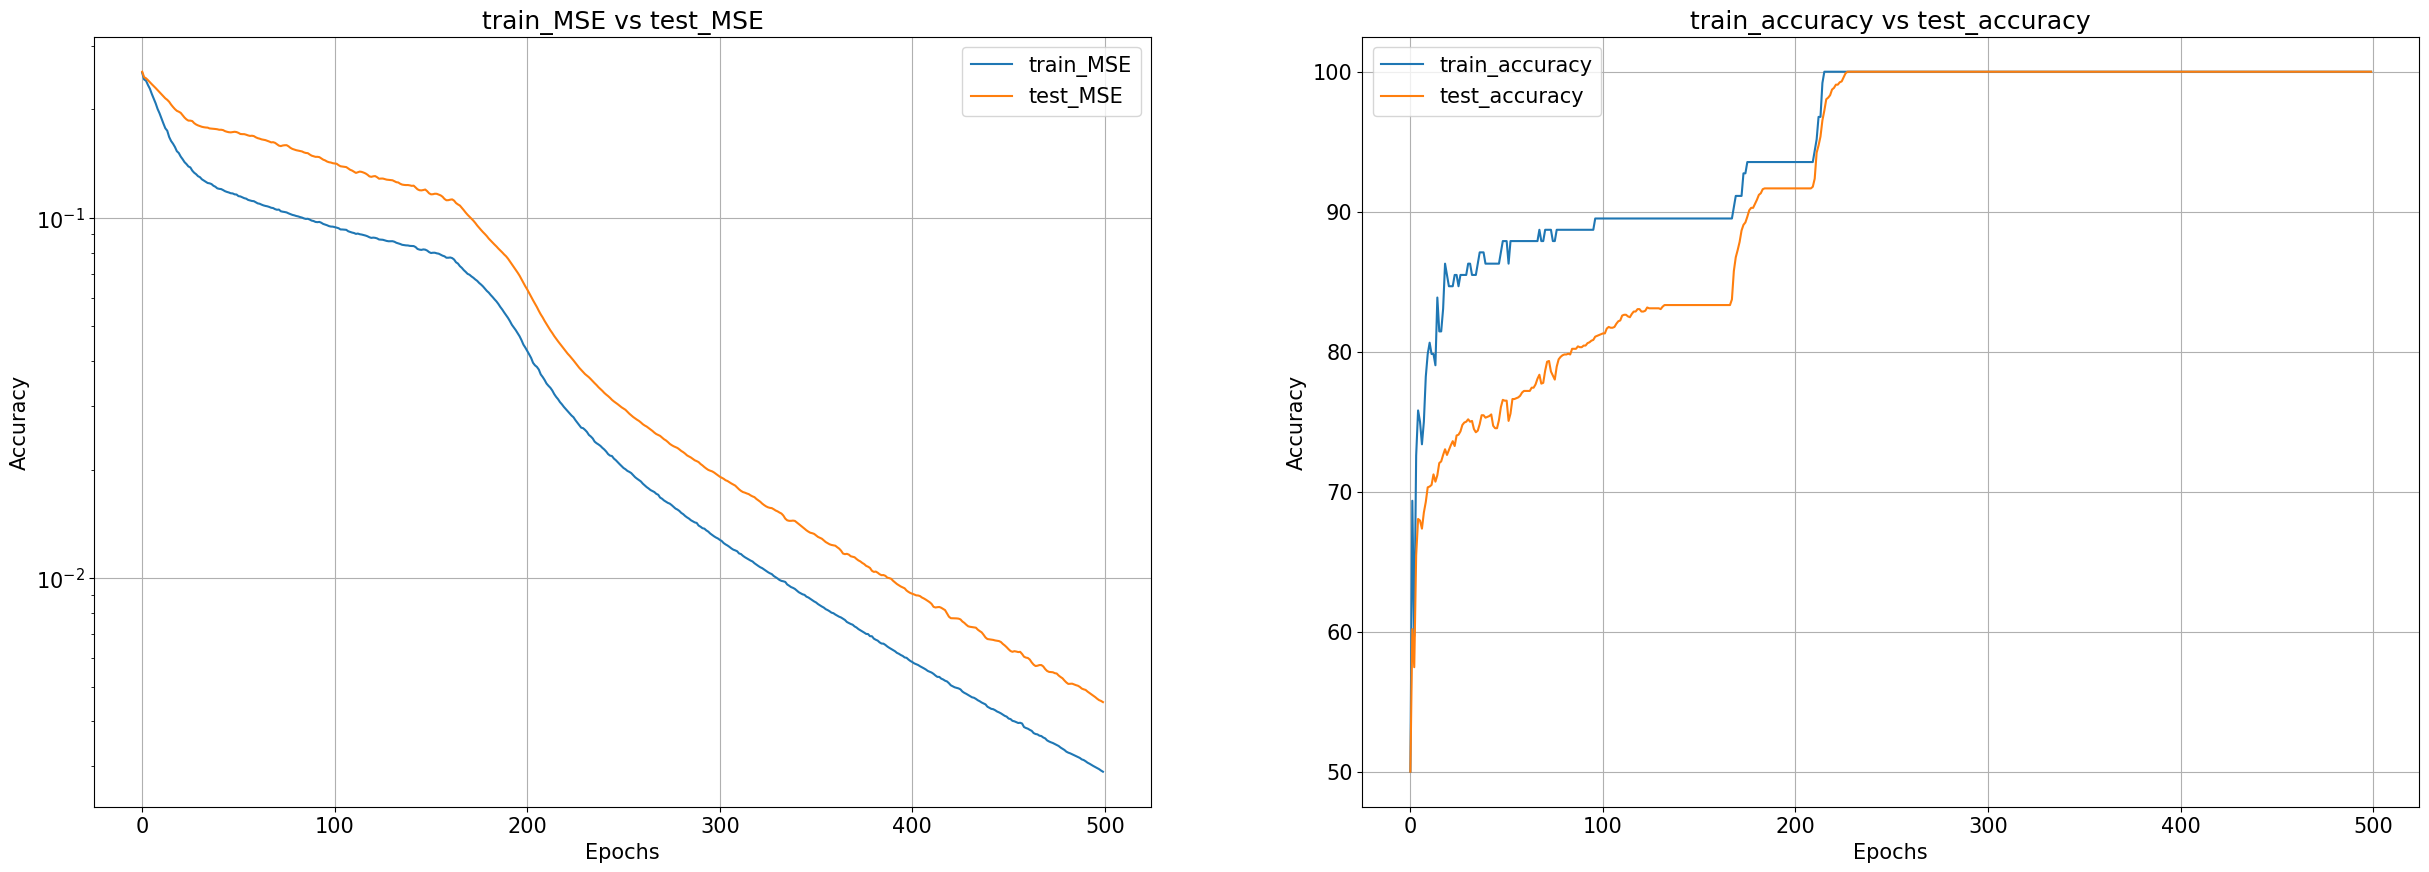

Epoch 0: train_loss: 7.069e-01, test_loss: 7.085e-01; train_accuracy: 5.000e+01, test_accuracy: 5.046e+01  train_MSE: 2.568e-01, test_MSE: 2.576e-01  lr : 0.11135528725660043
Epoch 1: train_loss: 6.936e-01, test_loss: 7.041e-01; train_accuracy: 5.000e+01, test_accuracy: 4.977e+01  train_MSE: 2.503e-01, test_MSE: 2.554e-01  lr : 0.11135528725660043
Epoch 2: train_loss: 6.706e-01, test_loss: 6.898e-01; train_accuracy: 5.484e+01, test_accuracy: 5.046e+01  train_MSE: 2.388e-01, test_MSE: 2.484e-01  lr : 0.11135528725660043
Epoch 3: train_loss: 6.515e-01, test_loss: 6.804e-01; train_accuracy: 7.339e+01, test_accuracy: 6.204e+01  train_MSE: 2.293e-01, test_MSE: 2.436e-01  lr : 0.11135528725660043
Epoch 4: train_loss: 6.373e-01, test_loss: 6.773e-01; train_accuracy: 7.097e+01, test_accuracy: 6.042e+01  train_MSE: 2.224e-01, test_MSE: 2.419e-01  lr : 0.11135528725660043
Epoch 5: train_loss: 6.181e-01, test_loss: 6.699e-01; train_accuracy: 7.339e+01, test_accuracy: 6.343e+01  train_MSE: 2.131e-

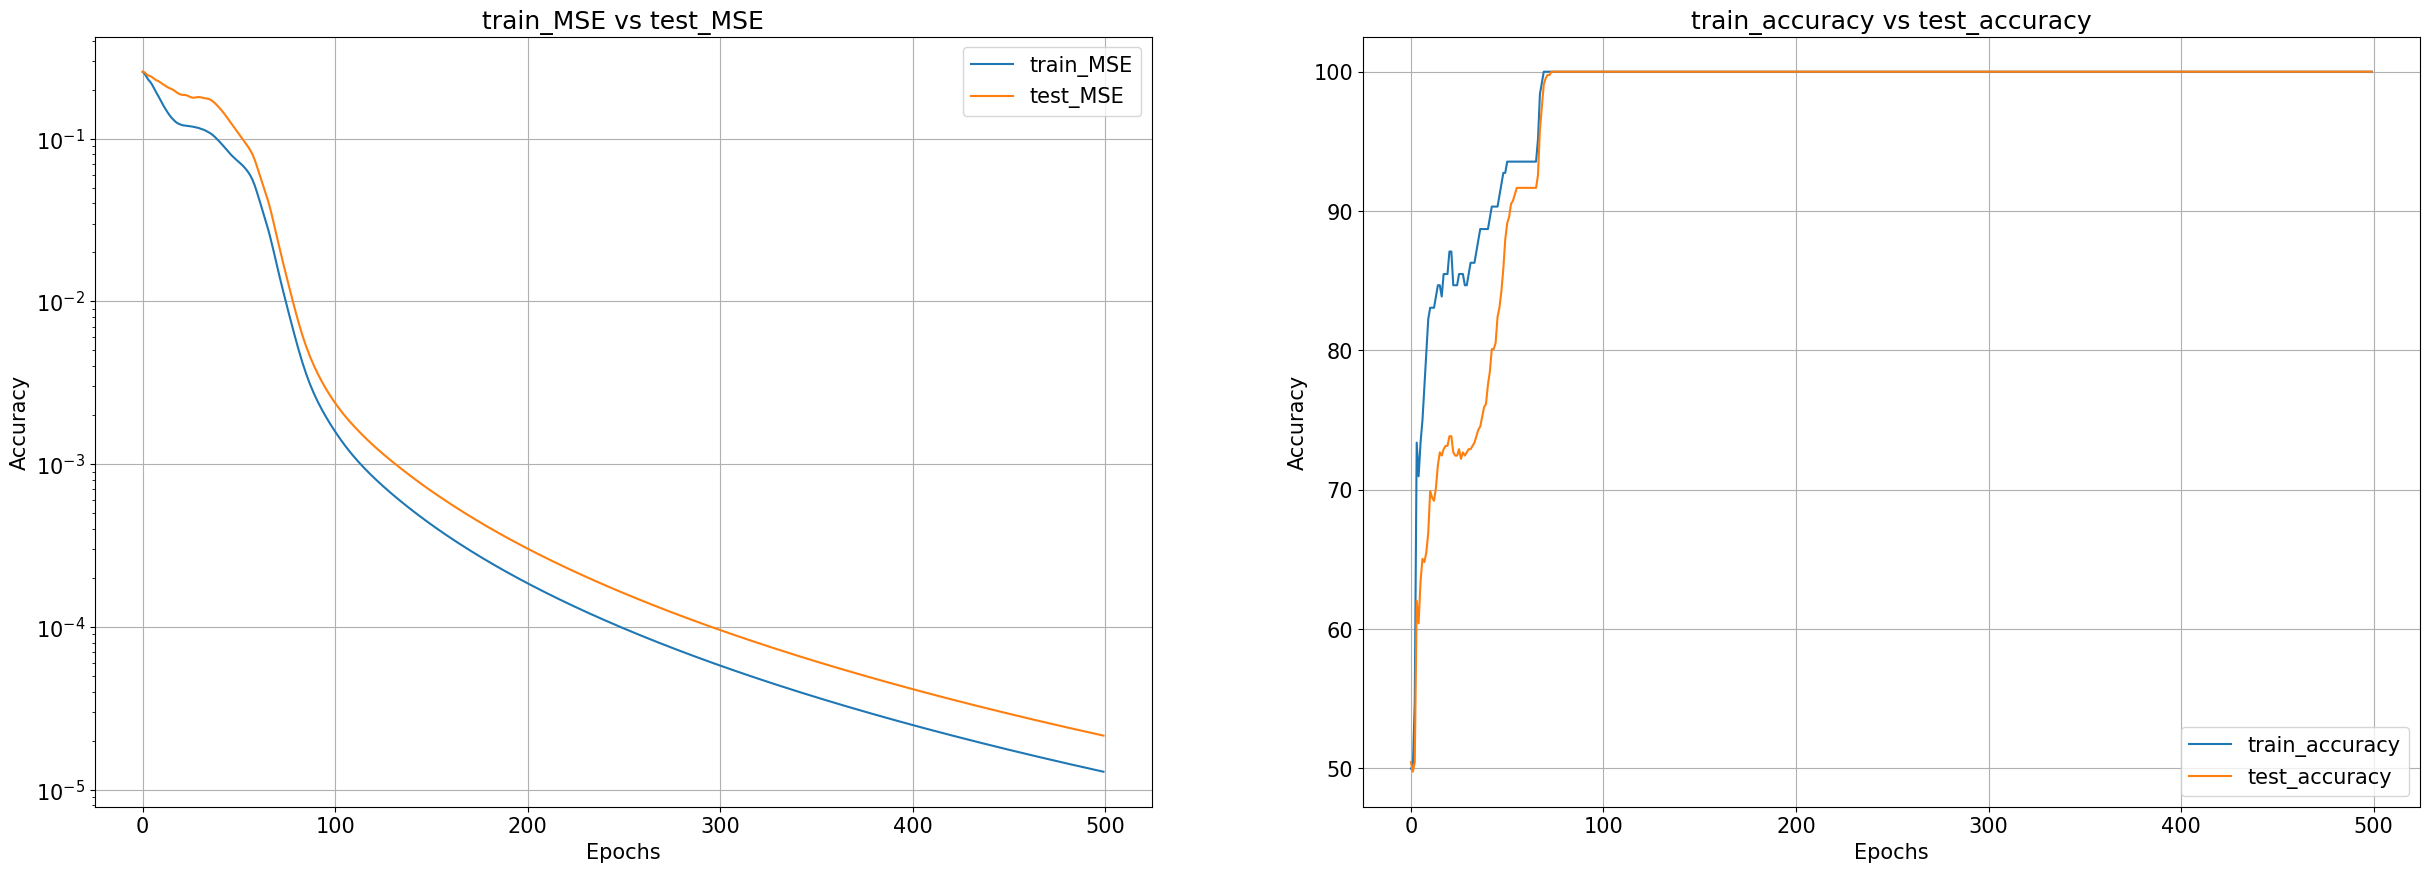

Epoch 0: train_loss: 7.021e-01, test_loss: 7.013e-01; train_accuracy: 5.000e+01, test_accuracy: 5.000e+01  train_MSE: 2.544e-01, test_MSE: 2.540e-01  lr : 0.11135528725660043
Epoch 1: train_loss: 6.748e-01, test_loss: 6.793e-01; train_accuracy: 6.935e+01, test_accuracy: 6.273e+01  train_MSE: 2.408e-01, test_MSE: 2.431e-01  lr : 0.11135528725660043
Epoch 2: train_loss: 6.699e-01, test_loss: 6.815e-01; train_accuracy: 5.000e+01, test_accuracy: 4.977e+01  train_MSE: 2.387e-01, test_MSE: 2.444e-01  lr : 0.11135528725660043
Epoch 3: train_loss: 6.533e-01, test_loss: 6.730e-01; train_accuracy: 5.403e+01, test_accuracy: 5.000e+01  train_MSE: 2.306e-01, test_MSE: 2.403e-01  lr : 0.11135528725660043
Epoch 4: train_loss: 6.288e-01, test_loss: 6.565e-01; train_accuracy: 7.097e+01, test_accuracy: 5.926e+01  train_MSE: 2.185e-01, test_MSE: 2.321e-01  lr : 0.11135528725660043
Epoch 5: train_loss: 6.063e-01, test_loss: 6.411e-01; train_accuracy: 7.661e+01, test_accuracy: 6.736e+01  train_MSE: 2.074e-

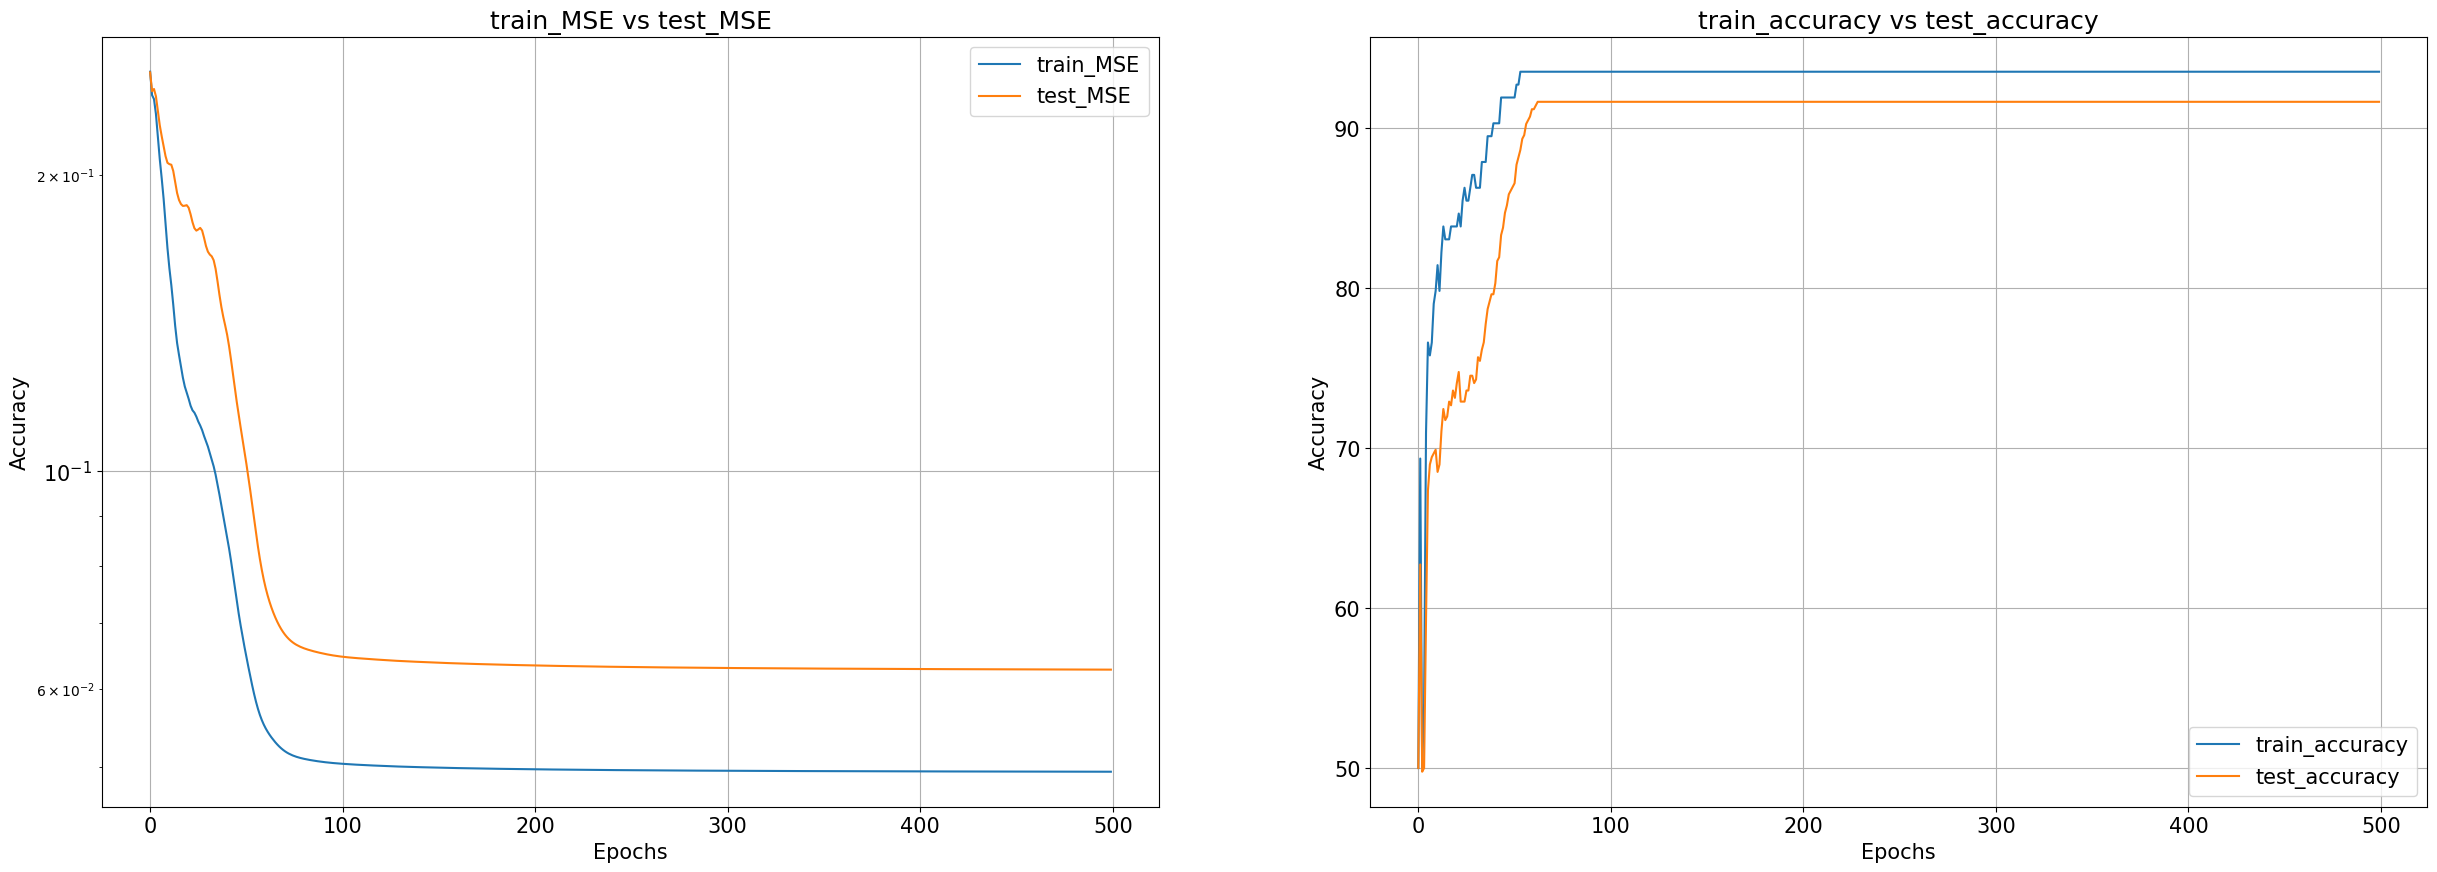

Epoch 0: train_loss: 7.038e-01, test_loss: 7.008e-01; train_accuracy: 5.242e+01, test_accuracy: 5.139e+01  train_MSE: 2.551e-01, test_MSE: 2.537e-01  lr : 0.1
Epoch 1: train_loss: 6.827e-01, test_loss: 6.871e-01; train_accuracy: 5.161e+01, test_accuracy: 5.006e+01  train_MSE: 2.448e-01, test_MSE: 2.470e-01  lr : 0.1
Epoch 2: train_loss: 6.603e-01, test_loss: 6.668e-01; train_accuracy: 6.613e+01, test_accuracy: 6.273e+01  train_MSE: 2.337e-01, test_MSE: 2.369e-01  lr : 0.1
Epoch 3: train_loss: 6.123e-01, test_loss: 6.467e-01; train_accuracy: 7.097e+01, test_accuracy: 6.661e+01  train_MSE: 2.105e-01, test_MSE: 2.270e-01  lr : 0.1
Epoch 4: train_loss: 5.536e-01, test_loss: 6.204e-01; train_accuracy: 7.742e+01, test_accuracy: 6.916e+01  train_MSE: 1.831e-01, test_MSE: 2.143e-01  lr : 0.1
Epoch 5: train_loss: 5.135e-01, test_loss: 6.097e-01; train_accuracy: 7.903e+01, test_accuracy: 6.765e+01  train_MSE: 1.660e-01, test_MSE: 2.103e-01  lr : 0.1
Epoch 6: train_loss: 4.727e-01, test_loss: 5.7

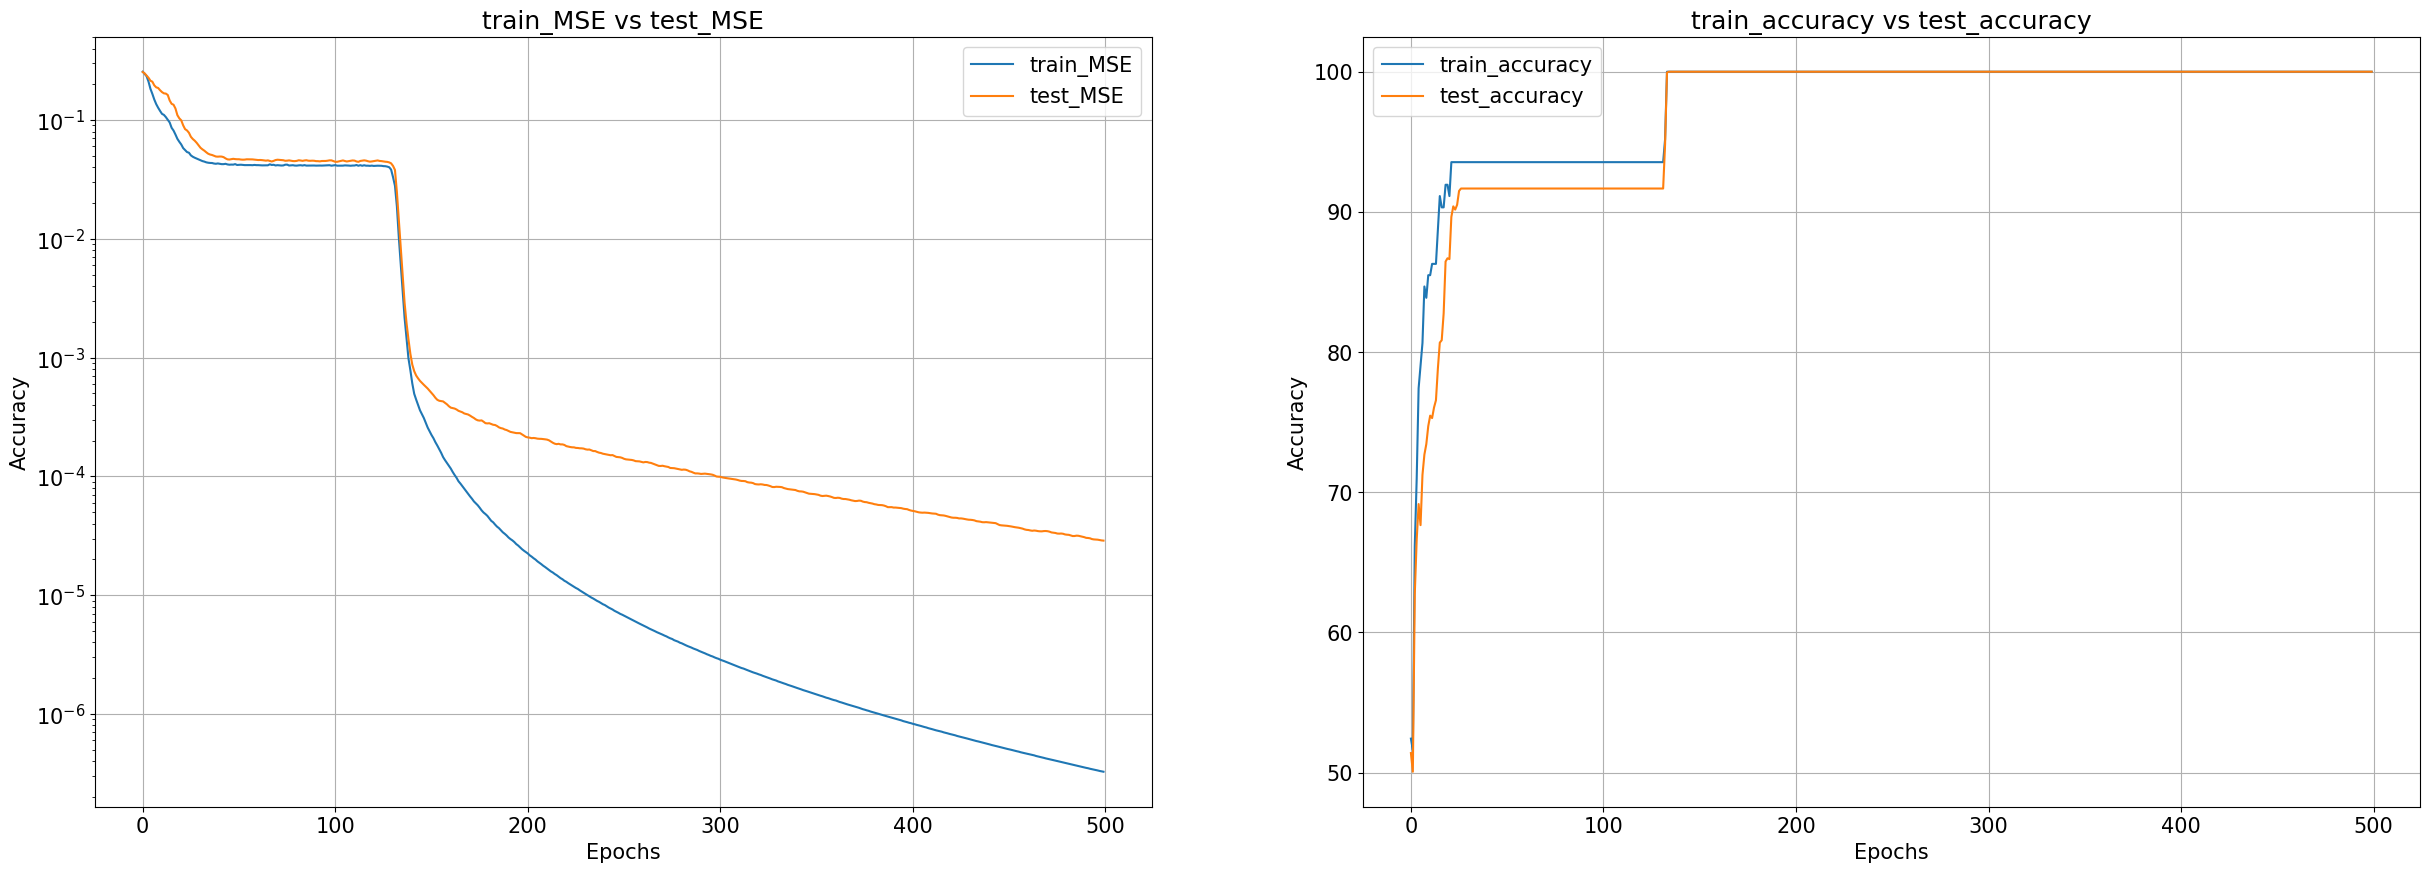

In [7]:
for i,p_comb in enumerate(p_best):

    best_comb = p_comb.copy()

    results = best_comb.pop('results')
    if best_comb['n_batch'] == 'batch':
        best_comb['n_batch'] = X_train.shape[1]
    elapsed_time = best_comb.pop('elapsed_time')
    if best_comb['scale_eta_batchsize'] == 'lin':
        best_comb['eta'] = best_comb['eta'] * best_comb['n_batch']
    if best_comb['scale_eta_batchsize'] == 'sqrt':
        best_comb['eta'] = best_comb['eta'] * np.sqrt(best_comb['n_batch'])
    best_comb.pop('scale_eta_batchsize')

    #print(best_comb)
    #print(results)
    
    input_layer = Input(X_train.shape[0])
    hidden_layer = Layer(input_layer, best_comb.pop('dim_hidden'), best_comb.pop('hidden_act_func'))
    output_layer = Layer(hidden_layer, 1, 'sigm')

    model = NeuralNetwork(input_layer, output_layer, 'binary_crossentropy', metrics=[accuracy, MSE])
    history = model.retrain(X_train, y_train.reshape((1,X_train.shape[1])), test_data = [X_test,y_test.reshape((1,X_test.shape[1]))], **best_comb)

    '''plt.figure(1)
    plt.plot(history['train_loss'],label='train_loss')
    plt.plot(history['test_loss'], label='test_loss')
    plt.yscale('log')
    plt.xlabel('Epochs', size=15)
    plt.ylabel('Loss functions', size=15)
    plt.title('train_loss vs test_loss', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.legend(fontsize=15)

    plt.figure(2)
    plt.plot(history['train_accuracy'],label='train_accuracy')
    plt.plot(history['test_accuracy'], label='test_accuracy')
    plt.xlabel('Epochs', size=15)
    plt.ylabel('Accuracy', size=15)
    plt.title('train_accuracy vs test_accuracy', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.legend(fontsize=15)'''

    plt.figure(i, figsize=(30,10))
    plt.subplot(1,2,1)
    plt.plot(history['train_MSE'],label='train_MSE')
    plt.plot(history['test_MSE'], label='test_MSE')
    plt.yscale('log')
    plt.xlabel('Epochs', size=15)
    plt.ylabel('Accuracy', size=15)
    plt.title('train_MSE vs test_MSE', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.legend(fontsize=15)

    plt.subplot(1,2,2)
    plt.plot(history['train_accuracy'],label='train_accuracy')
    plt.plot(history['test_accuracy'], label='test_accuracy')
    plt.xlabel('Epochs', size=15)
    plt.ylabel('Accuracy', size=15)
    plt.title('train_accuracy vs test_accuracy', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.legend(fontsize=15)

    plt.show()